# Importing the Libraries and IRIS Dataset

In [80]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
#Importing the iris dataset
iris = datasets.load_iris()
x=iris.data
y=iris.target

#  scatter plots of every dimension versus another dimension

In [82]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

df['species'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})

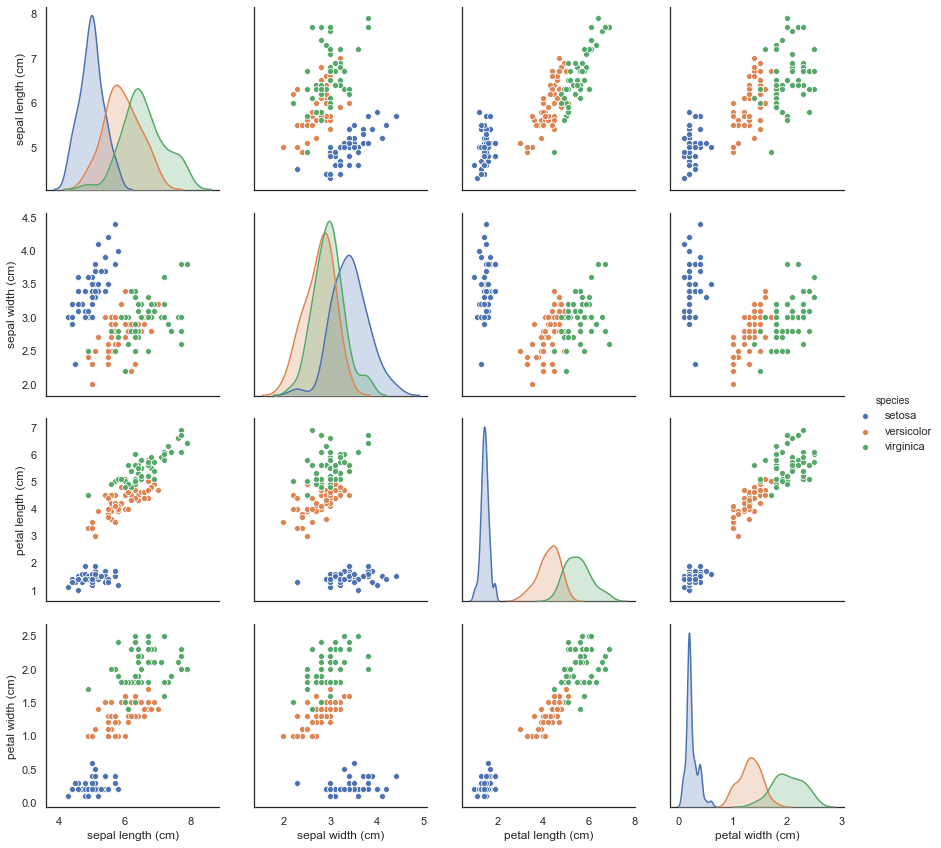

In [83]:
sns.pairplot(df.drop("target", axis=1), hue="species", height=3)

Explanation from the above pairplot: The given iris data set has 3 classes of flowers with 4 features. So the total number of pair plots will be 4C2 combinations = 6 plots. In the matrix plot, Legend says that blue points are Setosa, orange are Versicolor and green are Virginica. And what we see is the matrix of plots with 4 rows and 4 columns i.e., 4x4 matrix. Now , lets ignore the plots in the diagonal of a matrix. For the first row, the y-axis is always the Sepal_length . Similarly , 2nd row is of Sepal_width, 3rd and 4th with Petal_length and Petal_width respectively. Coming to the columns, the first column , x-axis is always the Sepal_length. Similarly, 2nd column is of Sepal_width, 3rd and 4th with Petal_length and Petal_width respectively. From above , the pairplots should be 6. But here ignoring the diagonal plots , we have 12 plots. If we observe carefully,dividing the plots as above diagonal and below diagonal plots, it’s clear that they are the mirror image plots to one another. Now, focusing on the below 6 plots, having x-axis as the Sepal_length, Petal_width and Petal_length are able to separate Setosa flowers from non-setosa flowers than that of the Sepal_width. Considering the plot between Petal_length and Petal_width, Setosa is very much significantly separated from non-setosa flowers. Here, we can build a very simple model to separate the three types of flowers. Now focusing on the diagonal plots, the petal length and petal width are almost same for the 3 classes i.e., for Setosa,versicolor,virginica.For Setosa, the sepal length is very high but versicolor and virginica have same sepal length less than Setosa.And then, virginica has more sepal width next with versicolor and then setosa.

Final Observation: 1) Petal_length and Petal_width are the most useful features to identify various flower types. 2) While Setosa can be easily identified (linearly seperable), Virginica and Versicolor have some overlap(almost linearly seperable).

>
<ol>
References:
<li>https://seaborn.pydata.org/generated/seaborn.pairplot.html</li>
<li>https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166</li>
   
</ol>

## Classifying the data using a KNN classifier. Tuning the hyperparameters of the KNN classifier using sklearn functions. Plotting the different validation accuracies against the values of the parameter and selecting the best hyperparameter to train the model. Reporting the resulting accuracy.

In [84]:
#Splitting the data into training and testing set with 80%,20% 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)
#Again splitting the training set into training set and Validation set with 60%,20%
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.25, random_state=42)

In [85]:
#Fitting the training data
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [86]:
#Predicting the test dataset
y_pred = classifier.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9666666666666667

In [88]:
#Testing the model with the validation set to find the best k value with obtained mean accuracy 
knnaccuracy = []
for k in [1,5,10,15,20,25,30,35]:
    classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_valone = classifier.predict(x_val)
    acc = accuracy_score(y_val,y_valone)
    knnaccuracy.append(acc)
knnaccuracy

[0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333]

In [89]:
#Creating a list k 
k = [1,5,10,15,20,25,30,35]
k

[1, 5, 10, 15, 20, 25, 30, 35]

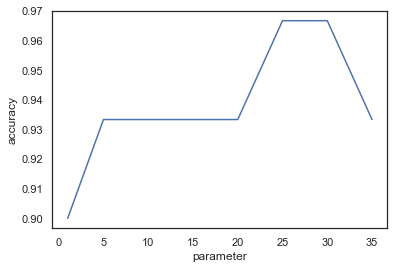

In [90]:
#Plotting the mean accuracy Vs k value
plt.plot(k,knnaccuracy)
plt.xlabel('parameter')
plt.ylabel('accuracy')
plt.show()

Explanation from the above plot:Higher value of k may cause overfitting,as both k values 25 and 30 have highest accuracy, taking k=25 is better what I think , considering overfitting into account.Now, finally reporting the test accuracy with k=25 as below.

In [91]:
#Using the best found k values from above plot, determining the test accuracy
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier(n_neighbors=25)
classifier.fit(x_train,y_train)
y_pred1 = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
testaccuracy1 = accuracy_score(y_test,y_pred1)
testaccuracy1

1.0

Conclusion: With selecting k=25 as the best hyper parameter , the test accuracy obtained is 100%.

>
<ol>
    References:
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html</li>
    <li>https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html</li>
</ol>

## Classifying data using a linear SVM classifier.

In [92]:
#Splitting the data into training set and testing set with 80%,20% respectively
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [93]:
#Applying 10-fold cross validation on the train-validation set 
accuracysvm = []
for i in [0.1,0.5,1,2,5,10,20,50]:
    classifier1 = svm.SVC(kernel = 'linear',C=i)
    val1 = cross_val_score(classifier1,x_train,y_train,cv=10)
    v1 = val1.mean()
    accuracysvm.append(v1)
accuracysvm

[0.9575757575757576,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9423076923076923,
 0.933974358974359]

In [94]:
#Creating a list C for storing the values
C = [0.1,0.5,1,2,5,10,20,50]
C

[0.1, 0.5, 1, 2, 5, 10, 20, 50]

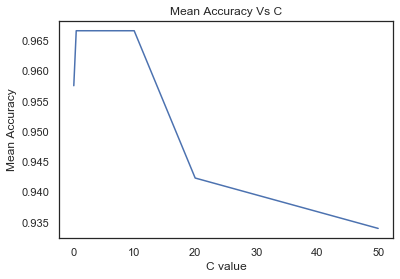

In [95]:
#Plotting the mean accuracy Vs C value
plt.plot(C,accuracysvm)
plt.xlabel('C value')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy Vs C')
plt.show()

Explanation from above plot: As SVM is all about Larger Margin, which is obtained at lower values of C. Hence , filtering from the values 2,5,10 which are having best mean accuracy from the above plot, C=2 is the best parameter value in this case.If we select a hyper-plane having low margin then there is high chance of miss-classification.Therefore, now we have to report the test accuracy with considering C = 2.

In [96]:
#Reporting the Test accuracy 
classifiersvm = svm.SVC(kernel='linear',C=2)
classifiersvm.fit(x_train,y_train)
y_pred2 = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
testaccuracy2 = accuracy_score(y_test,y_pred2)
testaccuracy2

1.0

Conclusion: With considering C=2, the test accuracy obtained is 100%.

>
<ol>
References:
    <li>https://scikit-learn.org/stable/modules/svm.html</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score</li>
    <li>https://scikit-learn.org/stable/modules/cross_validation.html</li>
    <li>https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a</li>
</ol>

## Classifying the data using three tree-based classifiers: Decision Trees, Random Forests and Gradient Tree Boosting. Tuning the hyper-parameters of the classifier using 10-fold cross validation and sklearn functions. Evaluating the best value for the number of trees and maximum depth of trees.

In [97]:
#Splitting the data into Training set and Testing set with (80%, 20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

DECISION TREE CLASSIFIER:

In [98]:
#Tuning the hyper parameter with 10-fold cross validation
accuracy1 = []
for depth in [3,5,10,None]:
    classifier = DecisionTreeClassifier(max_depth = depth,random_state=42)
    scores = cross_val_score(classifier,x_train,y_train,cv=10)
    acc = scores.mean()
    print(f"for depth:{depth} mean accuracy is {acc}")
    accuracy1.append(acc)

for depth:3 mean accuracy is 0.9332167832167831
for depth:5 mean accuracy is 0.908216783216783
for depth:10 mean accuracy is 0.9248834498834497
for depth:None mean accuracy is 0.9248834498834497


In [99]:
accuracy1

[0.9332167832167831, 0.908216783216783, 0.9248834498834497, 0.9248834498834497]

In [100]:
#Creating a list d for storing the max_depth values
d = ["3","5","10","None"]

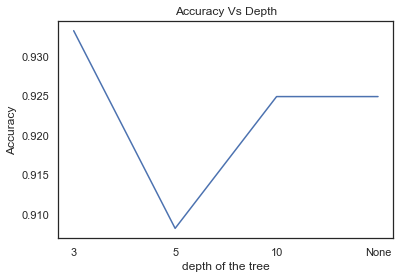

In [101]:
#Plotting the accuracy Vs max_depth
plt.plot(d,accuracy1)
plt.xlabel('depth of the tree')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Depth')
plt.show()

In [102]:
#Analysing the test accuracy 
classifierdt = DecisionTreeClassifier(max_depth = 3,random_state=42)
classifierdt.fit(x_train,y_train)
y_pred2 = classifierdt.predict(x_test)
testaccuracydt = accuracy_score(y_test,y_pred2)
print(f"for maximum depth:3 test accuracy is {testaccuracydt}")

for maximum depth:3 test accuracy is 1.0


Conclusion for Decision Tree Classifier:In Decision Tree ,as the max_depth increases it suffers a problem with overfitting. Hence the less value of max_depth is always best for obtaining better accuracy.Now, again report the test accuracy with max_depth as 3, we get 100% accuracy.

GRADIENT BOOSTING CLASSIFIER

In [103]:
#Tuning the hyper parameter with 10-fold cross validation
from sklearn.ensemble import GradientBoostingClassifier
accuracy2 = []
for estimators in [5,10,50,150,200]:
    classifiergb = GradientBoostingClassifier(n_estimators=estimators,random_state = 42)
    scoresgb = cross_val_score(classifiergb,x_train,y_train,cv=10)
    acc1 = scoresgb.mean()
    print(f"for estimators:{estimators} mean accuracy is {acc1}")
    accuracy2.append(acc1)

for estimators:5 mean accuracy is 0.9325757575757574
for estimators:10 mean accuracy is 0.9325757575757574
for estimators:50 mean accuracy is 0.9248834498834497
for estimators:150 mean accuracy is 0.9165501165501164
for estimators:200 mean accuracy is 0.9165501165501164


In [104]:
#Creating a list n_estimators for storing number of estimators
n_estimators = [5,10,50,150,200]

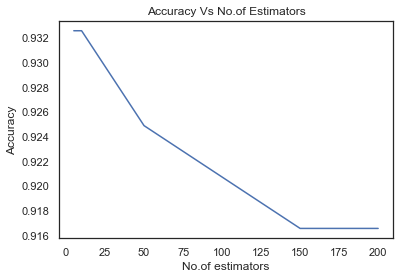

In [105]:
#Plotting the mean accuracy Vs No.of Estimators
plt.plot(n_estimators,accuracy2)
plt.xlabel('No.of estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs No.of Estimators')
plt.show()

In [106]:
#Determining the test accuracy
classifiergb = GradientBoostingClassifier(n_estimators=5,random_state = 42)
classifiergb.fit(x_train,y_train)
y_pred3 = classifiergb.predict(x_test)
testaccuracygb = accuracy_score(y_test,y_pred3)
print(f"for estimators:5 test accuracy is {testaccuracygb}")

for estimators:5 test accuracy is 1.0


Conclusion for Gradient Boosting Classifier: Here in this classifier, as the number of estimators increases , the accuracy keeps on decreasing with 10-fold cross validation.For the values 5 and 10,the accuracy is same.But to select one from them,to overcome the problem of overfitting , we consider 5 estimators and then report the test accuracy for that which gives 100%.

RANDOM FOREST CLASSIFIER:

In [107]:
#Tuning the hyper paramters with 10-fold cross validation 
from sklearn.ensemble import RandomForestClassifier
accuracy3 = []
for estimators in [5,10,50,150,200]:
    for depth in [3,5,10,None]:
        classifierrf = RandomForestClassifier(n_estimators=estimators,max_depth = depth,random_state=42)
        scoresrf = cross_val_score(classifierrf,x_train,y_train,cv=10)
        acc3 = scoresrf.mean()
        #print(f"for trees:{trees} acc is {acc3}")
        #print(f"for depth:{depth} acc is {acc3}")
        accuracy3.append(acc3)
accuracy3

[0.9248834498834497,
 0.9248834498834497,
 0.9248834498834497,
 0.9248834498834497,
 0.9332167832167831,
 0.9248834498834497,
 0.9248834498834497,
 0.9248834498834497,
 0.9415501165501163,
 0.9415501165501163,
 0.9332167832167831,
 0.9332167832167831,
 0.9415501165501163,
 0.9332167832167831,
 0.9248834498834497,
 0.9248834498834497,
 0.9415501165501163,
 0.9332167832167831,
 0.9332167832167831,
 0.9332167832167831]

In [108]:
a1 = [0.9248834498834497,
 0.9248834498834497,
 0.9248834498834497,
 0.9248834498834497]
a2 = [0.9332167832167831,
 0.9248834498834497,
 0.9248834498834497,
 0.9248834498834497]
a3 = [0.9415501165501163,
 0.9415501165501163,
 0.9332167832167831,
 0.9332167832167831]
a4 = [0.9415501165501163,
 0.9332167832167831,
 0.9248834498834497,
 0.9248834498834497]
a5 = [0.9415501165501163,
 0.9332167832167831,
 0.9332167832167831,
 0.9332167832167831]

In [109]:
#Storing the number of estimators and max_depth in 2 lists and passing the values as strings
estimators = ["5","10","50","150","200"]
depth = ["3","5","10","None"]
#Creating a list with 5*4 values
rfaccuracy = [a1,a2,a3,a4,a5]
rfaccuracy

[[0.9248834498834497,
  0.9248834498834497,
  0.9248834498834497,
  0.9248834498834497],
 [0.9332167832167831,
  0.9248834498834497,
  0.9248834498834497,
  0.9248834498834497],
 [0.9415501165501163,
  0.9415501165501163,
  0.9332167832167831,
  0.9332167832167831],
 [0.9415501165501163,
  0.9332167832167831,
  0.9248834498834497,
  0.9248834498834497],
 [0.9415501165501163,
  0.9332167832167831,
  0.9332167832167831,
  0.9332167832167831]]

In [110]:
#Making it an array 
accuracyrf = np.array(rfaccuracy)
accuracyrf

array([[0.92488345, 0.92488345, 0.92488345, 0.92488345],
       [0.93321678, 0.92488345, 0.92488345, 0.92488345],
       [0.94155012, 0.94155012, 0.93321678, 0.93321678],
       [0.94155012, 0.93321678, 0.92488345, 0.92488345],
       [0.94155012, 0.93321678, 0.93321678, 0.93321678]])

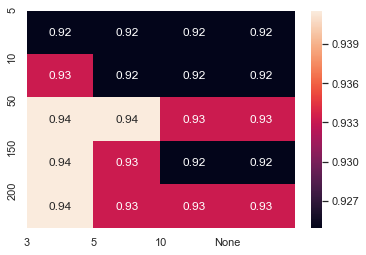

In [111]:
#Plotting the HeatMap i.e., HeatPlot
import seaborn as sns
fig , ax = plt.subplots()
heat_map = sns.heatmap(accuracyrf,annot = True)
ax.set_yticks(np.arange(len(estimators)))
ax.set_xticks(np.arange(len(depth)))
ax.set_yticklabels(estimators)
ax.set_xticklabels(depth)
plt.show()

In [112]:
classifierrf = RandomForestClassifier(n_estimators=50,max_depth = 3,random_state=42)
classifierrf.fit(x_train,y_train)
y_pred2 = classifierrf.predict(x_test)
testaccuracyrf = accuracy_score(y_test,y_pred2)
print(f"for estimators:50 and max_depth:3 test accuracy is {testaccuracyrf}")

for estimators:50 and max_depth:3 test accuracy is 1.0


Conclusion for Random Forest Classifier: Hyperparameter tuning can be advantageous in creating a model that is better at classification.If the number of observations is large, but the number of trees is too small, then some observations will be predicted only once or even not at all. If the number of predictors is large but the number of trees is too small, then some features can (theoretically) be missed in all subspaces used. Both cases results in the decrease of random forest predictive power. But the last is a rather extreme case, since the selection of subspace is performed at each node. Here it's better to consider max_depth with less value with number of estimators=50 giving better accuracy. That is, from above plot consider max_depth=3 and no.of estimators = 50 having accuracy=94.15%.This is why because, considering computational time into account,number of estimators should be less. Finally, reporting the test accuracy with those hyper parameters gives 100% accuracy.

>
<ol>
    References:
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score</li>
    <li>https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html</li>
    <li>https://scikit-learn.org/stable/modules/tree.html</li>
</ol>

# Few explanations

## why to split the dataset into train and test sets

1.The name machine learning itself is about a machine that is going to learn something.Well here it's the algorithm mature model that is going to learn from the data to make predictions or other machine learning goals and so machine learning model is going to learn to do something on the data set by understanding some correlations that there is in the dataset and imagine the machine learning model is learning too much on the data set like it's learning too much to correlations then the performance wouldn't be great. And then you said with slightly different correlations, it's like a student who is learning by heart his lesson. And then when he takes the exam he might be in trouble because he learned too much his lesson by heart and he does not manage to make the connection between what he learned and the exam. And it's the same for machine learning. We are going to build our machine learning models on a data set but then we have to test it on a new set which is going to be slightly different from the dataset on which we build the machine model. So we have to make two different sets of training sets on which we build the machine only model and a test set on which we test the performance of this machine learning model and the performance on the test set shouldn't be that different from the performance on the training sets because this would mean that the machine learning models understood well the correlations and didn't learn them by heart so that we can adapt to new sets and new situations. So, that's the idea about splitting the dataset into a training set and a test set.

>
<ol>
    References:
    <li>https://www.udemy.com/course/machinelearning/</li>
</ol>

## why when finding the best parameters for KNN we didn’t evaluate directly on the test set and had to use a validation test

2.The best K is the one that corresponds to the lowest test error rate, if we carry out repeated measurements of the test error for different values of K. Inadvertently, what we are doing is using the test set as a training set.This means that we are underestimating the true error rate since our model has been forced to fit the test set in the best possible manner. Our model is then incapable of generalizing to newer observations, a process known as overfitting. Hence, touching the test set must only be done at the very end of our pipeline.An alternative approach involves estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm.The Test set and Validation set have different purposes. If we don't use any of them, we lose it's benefits.The validation set is used to help detect overfitting and to assist in hyper-parameter search.The test set is used to measure the performance of the model.
       Hence, when finding the best parameters for KNN we didn't evaluate directly on the test set and had used a validation test.

>
<ol>
    References:
    <li>https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/</li>
    <li>https://machinelearningmastery.com/difference-test-validation-datasets/</li>
</ol>

## What was the effect of changing k for KNN

3.The ideal k varies depending on data and domain.In KNN, finding the value of k is not easy.Here,we can observe that there was an unordered affect with increase in the k value. From k=1 to k=5 , there is an increase in accuracy but later from 
k=[5,10,15,20] they all have the same accuracy. Again for k=25 and k=30, the values are same having an increase compared with the previous accuracy value. For k=35, it again dropped.So we can observe that there is no particular gradual increase or decrease in the accuracy with change in the k value.This has happened because a small value of k means that noise will have a higher influence on the accuracy and a large value make it computationally expensive and also causes overfitting.

>
<ol>
    References:
    <li>https://scialert.net/fulltextmobile/?doi=jas.2014.171.176</li>
    <li>https://askdatascience.com/170/what-happens-asthe-k-increases-in-the-knn-algorithm</li>
</ol>

##  What was the relative effect of changing the max depths for decision tree, random forests, and gradient boosting

4.Here in the problem 4, for Decision Tree Classifier, as the max_depth increases from 3 to 5, the accuracy has decreased and later as it increases from 5 to 10,the accuracy has again increased but not to the level where max_depth is 3. So, here there is no pattern for change in accuracy with max_depth.Coming to the Random Forest Classifier, with max_depth as 3 and increasing the number of estimators , increases the accuracy value. Similarly for max_depth as 5,10 and None almost same pattern is followed. But with fixed number of estimators and increase in max_depth , the accuracy drops a little with minute difference.So,in Random Forest Classifier,the number of estimators also plays a major role along with max_depth for determining accuracy.
        This has happened because, in Decision Tree ,as the max_depth increases it suffers a problem with overfitting.Hence the less value of max_depth is always best for obtaining better accuracy.
        Random Forest is the combination of multiple decision trees, it doesnot have a overfitting problem.By averaging out the impact of several decision trees, random forests tend to improve prediction.

>
<ol>
    References:
    <li>https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained</li>
    <li>https://stats.stackexchange.com/questions/36165/does-the-optimal-number-of-trees-in-a-random-forest-depend-on-the-number-of-pred/36183</li>
    <li>https://stackoverflow.com/questions/49289187/decision-tree-sklearn-depth-of-tree-and-accuracy</li>
<ol>

## What was the relative effect of changing the number of tree depths for random forests, and gradient boosting

5.Random forests are a large number of trees, combined at the end of the process.Gradient boosting machines also combine decision trees, but start the combining process at the beginning, instead of at the end.
    In Gradient Boosting Classifier, observing from the plot, as the number of estimators increases, the accuracy is decreased gradually with minute difference.
But considering the relative effect, in Random Forest, as the number of estimators increases,there is no pattern of increase or decrease in the accuracy value.This accuracy depends on the max_depth as well in Random Forest classifier. 
    As tuning the parameters, the Gradient boosting results in the better performance than Random Forests.However,gradient boosting might not be the better choice when we have lot of noise resulting in overfitting.

>
<ol>
    References:
    <li>https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4</li>
    <li>https://stats.stackexchange.com/questions/194226/random-forest-low-score-on-testing-data-scikit-learn</li>
    <li>https://medium.com/@aravanshad/gradient-boosting-versus-random-forest-cfa3fa8f0d80</li>
<ol>

## What does the parameter C define in the SVM classifier

6.The C is a Regularization parameter that tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.
      As the value of C increases, the accuracy increased and was constant for further values of C.But after a certain stage with much more increase in the C value resulted in the decrease of accuracy under cross validation.
      This has happened because, the more value of C causes the smaller margin and overfitting,hence the accuracy was low.The less the value of C gives better accuray with larger margin and thus reducing the noise in the data.

>
<ol>
    References:
    <li>https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a</li>
    <li>https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel</li>
</ol>